Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")


#Read in data

df = pd.read_csv("C:/Users/Shagun/Downloads/Kdrama.csv")
df.head(20)


,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",#4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#5,9.1
5,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Ye Ji, Oh Jung Se, Park Gyu ...","Psychological, Comedy, Romance, Drama, Fam...","Sibling Relationship, Melodrama, Mental Health...",#6,9.0
6,Reply 1988,2015,"Nov 6, 2015 - Jan 16, 2016","Friday, Saturday",20,tvN,1 hr. 40 min.,15+ - Teens 15 or older,"Five childhood friends, who all live in the sa...","Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...","Comedy, Romance, Youth, Family","Slice Of Life, Neighbors, Childhood Friends, M...",#7,9.0
7,Signal,2016,"Jan 22, 2016 - Mar 12, 2016","Friday, Saturday",16,tvN,1 hr. 15 min.,15+ - Teens 15 or older,"Fifteen years ago, a young girl was kidnapped ...","Lee Je Hoon, Kim Hye Soo, Jo Jin Woong, Kim Wo...","Thriller, Mystery, Crime, Drama, Supernatu...","Different Timelines, Hwaseong Serial Murders, ...",#8,9.0
8,Navillera,2021,"Mar 22, 2021 - Apr 27, 2021","Monday, Tuesday",12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 5 min.,15+ - Teens 15 or older,A 70-year-old with a dream and a 23-year-old w...,"Park In Hwan, Song Kang, Na Moon Hee, Hong Seu...","Friendship, Life, Drama, Family","Ballet, Unusual Friendship, Dream, Life Lesson...",#9,9.0
9,Mr. Queen,2020,"Dec 12, 2020 - Feb 14, 2021","Saturday, Sunday",20,tvN,1 hr. 20 min.,15+ - Teens 15 or older,Jang Bong Hwan is a South Korean chef who has ...,"Shin Hae Sun, Kim Jung Hyun, Bae Jong Ok, Kim ...","Historical, Comedy, Romance, Drama, Fantasy","Smart Male Lead, Transmigration, Calm Male Lea...",#10,9.0


Data Cleaning and Preparation

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
Name                 100 non-null object
Year of release      100 non-null int64
Aired Date           100 non-null object
Aired On             100 non-null object
Number of Episode    100 non-null int64
Network              100 non-null object
Duration             100 non-null object
Content Rating       100 non-null object
Synopsis             100 non-null object
Cast                 100 non-null object
Genre                100 non-null object
Tags                 100 non-null object
Rank                 100 non-null object
Rating               100 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.0+ KB


In [66]:
#Search for missing data
#df.isna().sum()  

for col in df.columns:
    missing_percentage = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_percentage))

Name - 0.0%
Year of release - 0.0%
Aired Date - 0.0%
Aired On - 0.0%
Number of Episode - 0.0%
Network - 0.0%
Duration - 0.0%
Content Rating - 0.0%
Synopsis - 0.0%
Cast - 0.0%
Genre - 0.0%
Tags - 0.0%
Rank - 0.0%
Rating - 0.0%


In [67]:
df.dtypes

Name                  object
Year of release        int64
Aired Date            object
Aired On              object
Number of Episode      int64
Network               object
Duration              object
Content Rating        object
Synopsis              object
Cast                  object
Genre                 object
Tags                  object
Rank                  object
Rating               float64
dtype: object

In [68]:
#Convert Content rating

df['Content Rating'].value_counts()

15+ - Teens 15 or older                   89
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    1
Name: Content Rating, dtype: int64

In [69]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
Rating = np.array(df['Content Rating'])
df['Content Rating'] = enc.fit_transform(Rating.reshape(-1,1)) # 2 = 18+, 1 = 15+, 0 = 13+
df['Content Rating'] = df['Content Rating'].astype('int64')
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,"Netflix, Netflix, Netflix, Netflix",52 min.,2,Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,1,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,1,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,1,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",#4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 32 min.,1,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#5,9.1


In [70]:
#Retaining just original network from the list of networks

for i , row in enumerate(df['Network']):
    network = str(row)
    network = network.split(',')
    df['Network'][i] = network[0].strip()
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,2,Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,tvN,1 hr. 30 min.,1,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,1,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,1,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",#4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,tvN,1 hr. 32 min.,1,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#5,9.1


In [71]:
df['Network'].value_counts()

tvN              32
SBS              19
jTBC             14
KBS2             11
MBC              10
OCN               8
Netflix           5
Daum Kakao TV     1
Name: Network, dtype: int64

In [72]:
#Converting ranking to int


for i,row in enumerate(df['Rank']):
    rank = row.strip('#')
    df['Rank'][i] = int(rank)

df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,2,Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,tvN,1 hr. 30 min.,1,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,1,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,1,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,tvN,1 hr. 32 min.,1,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",5,9.1


In [73]:
 #Dropping synopsis column
df.drop('Synopsis', axis = 1, inplace = True)
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,2,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,tvN,1 hr. 30 min.,1,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,1,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,1,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,tvN,1 hr. 32 min.,1,"Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",5,9.1


In [74]:
num_episode = df['Number of Episode'].value_counts().reset_index().rename(columns={'Number of Episode':'Count','index':'Num Ep'})
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,2,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,tvN,1 hr. 30 min.,1,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,1,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,1,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,tvN,1 hr. 32 min.,1,"Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",5,9.1


Data Analysis & Data Plots 

1. Episodes Distribution

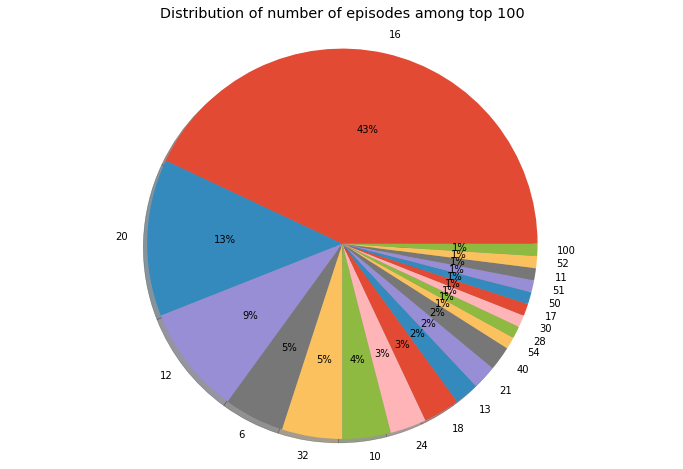

In [75]:
#Pie chart to show distribution of episodes
fig1, ax1 = plt.subplots()
ax1.pie(num_episode['Count'], labels=num_episode['Num Ep'], autopct='%1.f%%',
        shadow=True)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of number of episodes among top 100')
plt.axis('equal')
plt.show()

Best Drama Rating

In [95]:
df[df['Rating'] == df['Rating'].max()]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,2,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",1,9.2


Lowest Rated Drama

In [96]:
df[df['Rating']== df['Rating'].min()]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Cast,Genre,Tags,Rank,Rating
79,Missing,2020,"Aug 29, 2020 - Oct 11, 2020","Saturday, Sunday",12,OCN,1 hr. 10 min.,1,"Go Soo, Heo Joon Ho, Ahn So Hee, Ha Joon, Seo ...","Suspense, Thriller, Mystery, Crime, Fantasy","Con Artist, Ghost-seeing Male Lead, Spirit, Mi...",80,8.5
80,Kairos,2020,"Oct 26, 2020 - Dec 22, 2020","Monday, Tuesday",16,MBC,1 hr. 10 min.,1,"Shin Sung Rok, Lee Se Young, Ahn Bo Hyun, Nam ...","Thriller, Drama, Sci-Fi, Fantasy","Time Altering, Past And Present, Hardworking M...",81,8.5
81,Once Again,2020,"Mar 28, 2020 - Sep 13, 2020","Saturday, Sunday",100,KBS2,35 min.,1,"Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...","Business, Comedy, Romance, Life, Drama, F...","Divorce, Family Relationship, Multiple Couples...",82,8.5
82,The World of the Married,2020,"Mar 27, 2020 - May 16, 2020","Friday, Saturday",16,jTBC,1 hr. 20 min.,2,"Kim Hee Ae, Park Hae Joon, Han So Hee, Park Su...","Romance, Drama, Family, Melodrama","Infidelity, Extramarital Affair, Betrayal, Mak...",83,8.5
83,Extracurricular,2020,"Apr 29, 2020",Wednesday,10,Netflix,60 min.,2,"Kim Dong Hee, Park Joo Hyun, Jung Da Bin, Nam ...","Psychological, Crime, Life, School, Youth,...","Prostitution, Morally Ambiguous Lead, Illegal ...",84,8.5
84,Because This Is My First Life,2017,"Oct 9, 2017 - Nov 28, 2017","Monday, Tuesday",16,tvN,1 hr. 10 min.,1,"Jung So Min, Lee Min Ki, Esom, Park Byung Eun,...","Friendship, Comedy, Romance, Life, Drama","Contract Relationship, Marriage Of Convenience...",85,8.5
85,Circle,2017,"May 22, 2017 - Jun 27, 2017","Monday, Tuesday",12,tvN,60 min.,1,"Yeo Jin Goo, Kim Kang Woo, Gong Seung Yeon, Le...","Thriller, Mystery, Sci-Fi","Future, Alien, Bromance, Strong Female Lead, P...",86,8.5
86,What's Wrong with Secretary Kim,2018,"Jun 6, 2018 - Jul 26, 2018","Wednesday, Thursday",16,tvN,1 hr. 9 min.,1,"Park Min Young, Park Seo Joon, Lee Tae Hwan, P...","Friendship, Business, Comedy, Romance","Adapted From A Webtoon, Steamy Kiss, Male Chas...",87,8.5
87,When the Camellia Blooms,2019,"Sep 18, 2019 - Nov 21, 2019","Wednesday, Thursday",40,KBS2,35 min.,1,"Gong Hyo Jin, Kang Ha Neul, Kim Ji Suk, Son Da...","Thriller, Comedy, Romance, Drama, Family","Single Mother, Mystery, Police Officer, Mother...",88,8.5
88,Itaewon Class,2020,"Jan 31, 2020 - Mar 21, 2020","Friday, Saturday",16,jTBC,1 hr. 10 min.,1,"Park Seo Joon, Kim Da Mi, Kwon Na Ra, Yoo Jae ...","Food, Friendship, Business, Romance, Life,...","Revenge, Smart Female Lead, Female Chases Male...",89,8.5


Starring count of actors

In [79]:
from collections import Counter
cast_list = list()

for casts in df['Cast'].tolist():
    casts = casts.split(", ")
    for a in casts:
        cast_list.append(a)
        
cast_df = pd.DataFrame.from_dict(Counter(cast_list),orient = 'index').rename(columns = {0:'Appearance'})
cast_df.sort_values(by='Appearance',ascending = False,inplace = True)
cast_df.head(10)

,Appearance
Song Joong Ki,5
Lee Joon Hyuk,5
Kim Ji Won,5
Jung Kyung Ho,4
Bae Doo Na,4
Park Seo Joon,4
Jun Suk Ho,4
Kang Ha Neul,3
Kim Ok Bin,3
Lee Jong Suk,3


Obtaining Individuals Tags for Each Show

In [114]:
tags_list = list()

for tags in df['Tags'].tolist():
    tags = tags.split(", ")
    for a in tags:
        tags_list.append(a)

tags_df = pd.DataFrame.from_dict(Counter(tags_list), orient = 'index').rename(columns = {0:'Count'})
tags_df.sort_values(by='Count',ascending = False, inplace = True)
print((tags_df).head(20))


                         Count
Strong Female Lead          41
Smart Female Lead           23
Smart Male Lead             20
Murder                      17
Bromance                    17
Revenge                     15
Strong Male Lead            15
Trauma                      13
Multiple Mains              12
Power Struggle              12
Hardworking Female Lead     12
Nice Male Lead              11
Tragic Past                 11
Character Development       10
Death                        9
Strong Friendship            9
Adapted From A Webtoon       9
Corruption                   9
Sismance                     9
Female Centered Plot         8


Bar plotting - Top 10 tags vs Count

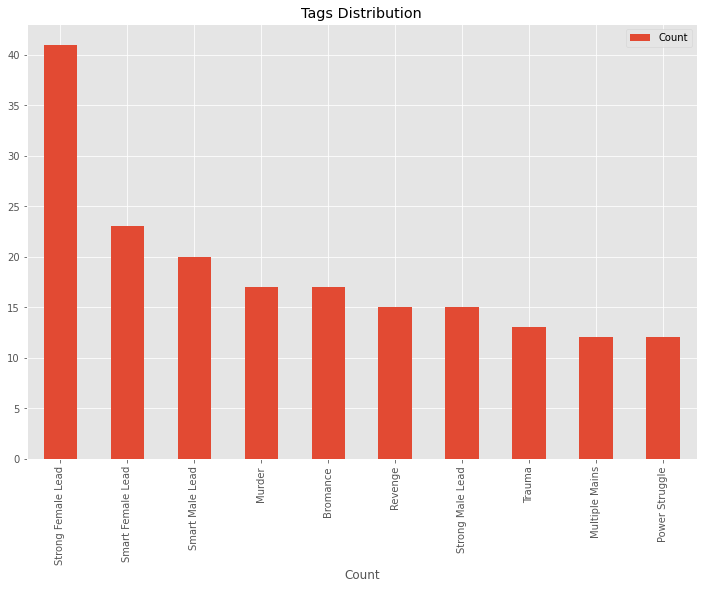

In [81]:
data_frame = tags_df.iloc[:10]
data_frame.plot.bar()


plt.title("Tags Distribution")
plt.xlabel('Count')
plt.show()


Genre Pie Chart Plotting 

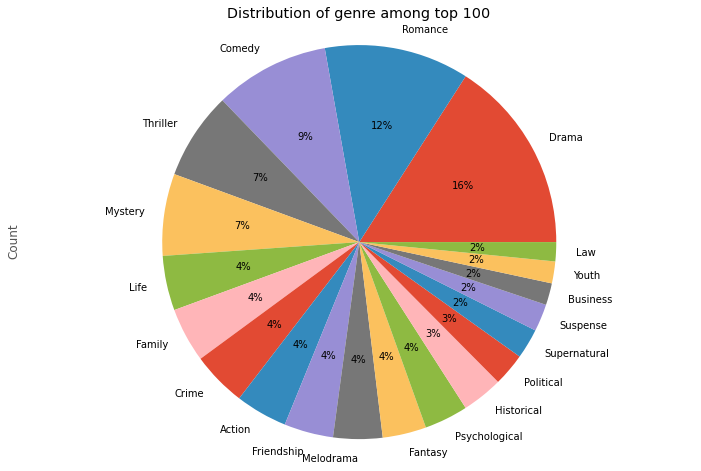

In [115]:
data_frame.plot.pie(y = 'Count',autopct='%1.f%%',legend = False)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of genre among top 100')
plt.show()

Obtaining Individual Genre Count for All Episodes

In [82]:
df['Genre'] = df['Genre'].str.strip()

genre_list = list()
for genres in df['Genre'].tolist():
    genres = genres.split(",  ")
    for gen in genres:
        genre_list.append(gen)
        
#print(genre_list)
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient = 'index').rename(columns = {0:'Count'})
genre_df.sort_values(by='Count',ascending = False, inplace = True)
print(genre_df)


               Count
Drama             71
Romance           53
Comedy            42
Thriller          32
Mystery           30
Life              20
Family            20
Crime             20
Action            19
Friendship        18
Melodrama         18
Fantasy           16
Psychological     16
Historical        15
Political         12
Supernatural      11
Suspense          10
Business           8
Youth              8
Law                7
Horror             7
Medical            7
School             5
Military           3
Sports             3
Sci-Fi             3
Food               2
Investigation      2
Zombies            2
Martial Arts       1
Music              1


Bar Plot for Genre Distribution

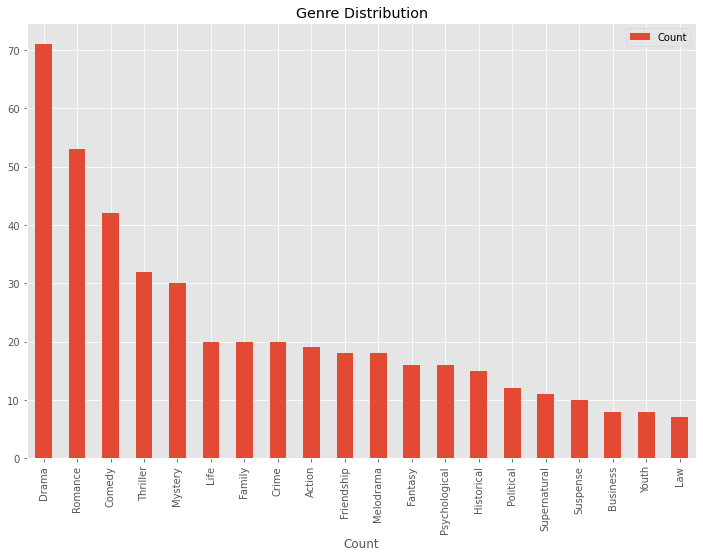

In [83]:
data_frame = genre_df.iloc[:20]
data_frame.plot.bar()


plt.title("Genre Distribution")
plt.xlabel('Count')
plt.show()

Distribution of Episodes by Content Rating

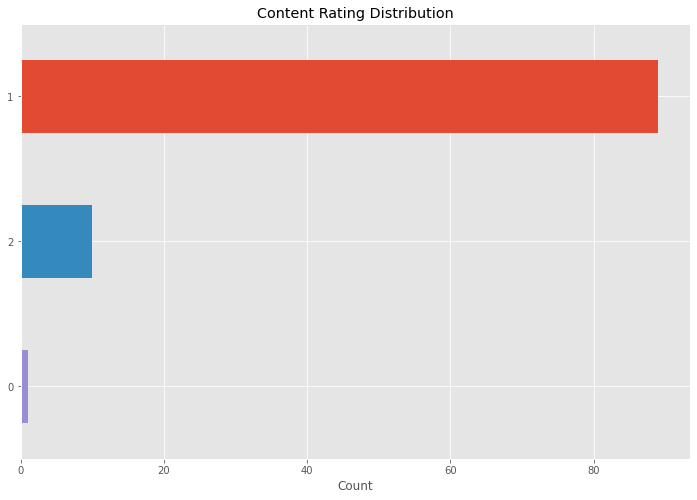

1    89
2    10
0     1
Name: Content Rating, dtype: int64

In [84]:
df['Content Rating'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Content Rating Distribution")
plt.xlabel('Count')
plt.show()

df['Content Rating'].value_counts()